In [1]:
import random
import time
import statistics as st
import csv
import numpy as np


def get_primes(start, stop):
    # Returns a list of prime number between start and stop
    if start >= stop:
        return []

    primes = [2]
    for n in range(3, stop + 1, 2):
        for p in primes:
            if n % p == 0:
                break
        else:
            primes.append(n)

    while primes and primes[0] < start:
        del primes[0]

    return primes


def is_prime(x):
    # Returns True if x is True, False if x is False
    # May not need this
    if x == 2:
        return True
    if x < 2 or x % 2 == 0:
        return False
    for n in range(3, int(x ** .5) + 2, 2):
        if x % n == 0:
            return False
    return True


def are_rel_prime(a, b):
    # Returns True if a and b are relatively prime
    # Relatively Prime means they share no common positive factors (other than 1).
    # In other words, the Greatest common divisor = 1
    if is_prime(a) is False:
        return 'A is not a Prime number.'
    elif is_prime(b) is False:
        return 'B is not a Prime number.'
    else:
        for n in range(2, min(a, b) + 1):
            if a % n == b % n == 0:
                return False

        return True


def gcd(a, b):
    # Finds the greatest common divisor of a and b
    # Uses the Euclidean Algorithm
    while b != 0:
        a, b = b, a % b
    return a


def modinv(a, m):
    # This returns a number that is the multiplicative inverse of a and m
    for x in range(1, m):
        if (a * x) % m == 1:
            return x
    return None


def generate_keypair(p, q):
    # This generates the Public and Private key pairs
    # It uses the RSA Cryptography Algorithm,

    # This checks that both inputs are prime numbers and not equal
    if not (is_prime(p) and is_prime(q)):
        raise ValueError('Both numbers must be prime.')
    elif p == q:
        raise ValueError('p and q cannot be equal.')

    # Calculate n
    n = p * q
    # print ("n = ", n)

    # Calculate Phi
    phi = (p - 1) * (q - 1)
    # print ("phi = ", phi)

    # Select E, where E is relatively prime to phi
    e = random.randrange(1, phi)
    # e = 65537
    # print ("e = ", e)

    # Checks that e and phi are relatively prime.
    g = gcd(e, phi)
    while g != 1:
        e = random.randrange(1, phi)
        g = gcd(e, phi)

    # Determine D using the multiplicative inverse
    d = modinv(e, phi)
    # print ("d = ", d)

    # Returns the Public and Private Keys
    # Public Key pair is (e, n)
    # Private Key pair is (d, n)
    return ((e, n), (d, n))


def encrypt(pub_key, plaintext):
    # Unpack the key into it's components
    key, n = pub_key
    # Convert each letter in plaintext to numbers based on the character
    # Uses C = M^E mod N
    cipher = [(ord(char) ** key) % n for char in plaintext]
    # Return array of bytes
    return cipher


def decrypt(pk, ciphertext):
    # Unpack the key into its components
    key, n = pk
    # Convert to plaintext based on the ciphertext
    # Uses M = C^D mod N
    plain = [chr((char ** key) % n) for char in ciphertext]
    # Return the array of bytes as a string
    return ''.join(plain)



In [3]:
# Test case 1 - dYQc
# Test case 2 - TajaAxim
# Test case 3 - gZmmFsVOpYtd

if __name__ == '__main__':
    # Change these variables for various runs
    runs = 2            # number of runs of each p and q values
    trials = 2          # number of different p values to run
    message = '!_23?'    # the message to be encrypted and decrypted
    file = 'output_case_test.csv'  # file gname for testing case
    low = 100         # low cap for p and q values
    high = 1000          # high cap for p and q values

    # For set p and q values, use these lists and comment out the others
    # p = []
    # q = []

    # initialize p and q lists, these will hold p and q values
    p = []
    q = []

    # This creates the p and q values for random intervals
    # It pulls from the get_primes method
    # Range is the length of the p and q random lists (number of runs)
    for i in range(trials):
        x = random.choice(get_primes(low, high))
        y = random.choice(get_primes(low, high))

        # If the chosen p = q, a new x (p) is chosen.
        if x == y:
            x = random.choice(get_primes(low, high))

        p.append(x)   # adds p value to the p list
        q.append(y)   # adds q value to the q list

    # Main is the list that contains all of the pertinent information for the RSA algorithm output
    # main = [[p values], [q values], [time values (t)], [average values of each t list]]
    main = [p, q, [], []]

    # These variables are for output formatting.
    dash = '-' * 60
    dash2 = '-' * 30

    lp = len(main[0])  # number of p/q values, could probably use runs instead
    for n in range(lp):
        main[2].append([])
        main[3].append([])
        for times in range(runs):
            p_val = main[0][n]
            print ('p value is: ', p_val)   # prints p value
            q_val = main[1][n]
            print ('q value is: ', q_val)   # prints q value

            start = time.time()   # Starting timer, right before algorithm starts

            public, private = generate_keypair(p_val, q_val)
            print ('Public key : ', public)   # prints public key
            print ('Private key : ', private)   # prints private key

            encrypted_msg = encrypt(public, message)
            print ('Your encrypted message is: ', ''.join(map(lambda x: str(x), encrypted_msg)))
            print ('Your message is: ', decrypt(private, encrypted_msg))   # this prints the decrypted message

            end = time.time()    # Ending timer, right after algorithm ends (message is decrypted)

            total = end - start   # calculates total time taken
            print ('Time : ', total)   # The current run's time
            main[2][n].append(total)

            avg = st.mean(main[2][n])  # averages list of run times

            print ('T[n] contains: ', main[2])   # This is the current state of T(n), the times list
            print (dash2)

        main[3][n].append(avg)    # This adds average value to list
        print ('The Averages of each T[n] are ', main[3])
        print ('')
        print (dash)
        print ('')

    # This gives you the overall summary, may delete for summary below
    print ('p values: ', main[0])
    print ('q values: ', main[1])
    print ('Run times: ', main[2])
    print ('Average Run Times: ', main[3])

    print ('\n', dash)
    print ('', dash, '\n')

    # Prints out run summaries, giving p and q values, all run times and average run times
    for i in range(lp):
        print ('Run {}:'.format(i))
        print ('  p and q values are, {} and {}.'.format(main[0][i], main[1][i]))
        print ('  The run times were:')
        print ('  ', main[2][i])

        print ('  The average run time is: {}'.format(main[3][i]))
        
    
        
#     for x in range(len(main[3])):
#         temp = main[3][x][0]
#         print(temp)

#     print (main[0])
#     print (main[1])
#     print (main[2])
#     print (main[3])
        
    #writes output data to a csv (comma separated values) file
    with open(file, 'w') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        wr.writerow(['p values', 'q values', 'run times', 'Avg run time'])
        for i in range(lp):
            for j in range(runs):
                trial = main[3][i][0]
                print (trial)
                wr.writerow([main[0][i], main[1][i], main[2][i][j], trial])

    print ('\n', 'csv file has been written.')



p value is:  787
q value is:  619
Public key :  (219335, 487153)
Private key :  (44687, 487153)
Your encrypted message is:  377819281564114208174183402222
Your message is:  !_23?
Time :  0.28290891647338867
T[n] contains:  [[0.28290891647338867]]
------------------------------
p value is:  787
q value is:  619
Public key :  (352097, 487153)
Private key :  (266885, 487153)
Your encrypted message is:  21271194608176790460894378976
Your message is:  !_23?
Time :  1.8410847187042236
T[n] contains:  [[0.28290891647338867, 1.8410847187042236]]
------------------------------
The Averages of each T[n] are  [[1.0619968175888062]]

------------------------------------------------------------

p value is:  941
q value is:  977
Public key :  (706597, 919357)
Private key :  (327213, 919357)
Your encrypted message is:  470541130934645733302308828597
Your message is:  !_23?
Time :  3.4649975299835205
T[n] contains:  [[0.28290891647338867, 1.8410847187042236], [3.4649975299835205]]
-------------------

In [6]:
test = [[0.26775550842285156, 0.9508395195007324], [0.3425731658935547, 2.6623713970184326]]


print (test)

x = test[0][1]

print(x)

[[0.26775550842285156, 0.9508395195007324], [0.3425731658935547, 2.6623713970184326]]
0.9508395195007324


In [29]:
import pandas as pd

filepath = r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_test.csv'

df = pd.read_csv(filepath)

# df.head(25)

df_new = []

for i in range(0,25,5):
    current = df.iat[i,3]
    df_new.append(current)
    print (current)
    
print(df_new)
#df.iloc[5].iat[1,3]

#print(df.head(25))

# print(df['Avg run time'].dtypes)
# print(df['p values'].dtypes)


# TODO... take average ... and graph


2.280312490463257
1.058424139022827
0.9902539253234864
0.4872677803039551
1.1405263900756837
[2.280312490463257, 1.058424139022827, 0.9902539253234864, 0.4872677803039551, 1.1405263900756837]


In [1]:
import pandas as pd
# Testing for 

file_list1 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_dYQc.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_dYQc.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_dYQc.csv', 
            ]


file_list2 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_TajaAxim.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_TajaAxim.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_TajaAxim.csv', 
            ]

file_list3 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_ZgmmFsVOpYtd.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_ZgmmFsVOpYtd.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_ZgmmFsVOpYtd.csv', 
            ]    

file_list4 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_#7,1.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_#7,1.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_#7,1.csv', 
            ]


file_list5 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_@$!83_64.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_@$!83_64.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_@$!83_64.csv', 
            ]

file_list6 = [r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_1_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_2_010%95!!.41-.csv',
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_3_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_4_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_5_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_6_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_7_010%95!!.41-.csv', 
             r'C:\Users\Nick\PycharmProjects\RSA_Updated\output_case_8_010%95!!.41-.csv', 
            ]    

In [13]:
import pandas as pd
import numpy as np

def find_averages(file_list):
    averages = []

    for file in file_list:
        path = file
        df = pd.read_csv(path)
        df_new = []

        for i in range(0,25,5):
            current = df.iat[i,3]
            df_new.append(current)

        length = len(df_new)
        sum = 0
        for i in df_new:
            sum = sum + i

        avg = sum / length

        averages.append(avg)
        
    return averages
    
q = find_averages(file_list5)

print (q)


def x2(a):
    x = []
    for i in range(a):
        new = i ** 2
        x.append(new)
    return x

def x3(a):
    x = []
    for i in range(a):
        new = i ** 3
        x.append(new)
    return x

def log(a):
    in_array = []
    for i in range(a):
        in_array.append(i+1)
    x = []
    for i in in_array:
        new = np.log(i)
        x.append(new)
    return x


[0.0003989410400390625, 0.39139397621154787, 3.401257696151734, 25.872596387863155, 50.82829358100891, 120.93762168884277, 560.1779413604736, 521.9217684650421]


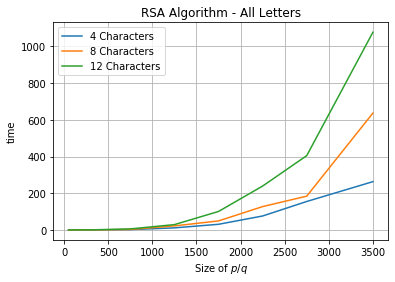

In [8]:

# '$O(n^3)$':     [1e-6*n**3 for n in middles],
# '$O(n)$':         [1e-4*n for n in middles],
# '$O(\log{n})$':   [1e-4*log(n) for n in middles],
# '$O(\log{n}**2)$':  [1e-4*log(n)**2 for n in middles]                 
# '$O(n\log{n})$':  [1e-4*n*log(n) for n in middles],
# '$O(n^2)$':       [1e-6*n**2 for n in middles],
# '$O(n^3)$':     [1e-6*n**3 for n in middles],
                   

#plt.xscale('log')
#plt.yscale('log')

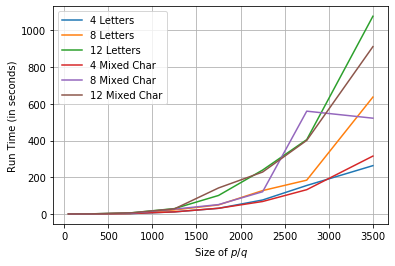

In [11]:
from matplotlib import pyplot as plt

# Using the mid-points to denote each range
middles = [50, 300, 750, 1250, 1750, 2250, 2750, 3500]

# Set list values from file path lists
average1 = find_averages(file_list1)
average2 = find_averages(file_list2)
average3 = find_averages(file_list3)
average4 = find_averages(file_list4)
average5 = find_averages(file_list5)
average6 = find_averages(file_list6)


if (len(average1) != len(average1) != len(average1)): 
    raise ValueError('Lengths of the File Lists must be same length')

# Since lists are all the same length, the length can be taken from any of them
len_list = len(average1)



df = pd.DataFrame({'Size of $p/q$':  middles,
                   '4 Letters':      average1,
                   '8 Letters':      average2,
                   '12 Letters':     average3,
                   '4 Mixed Char':   average4,
                   '8 Mixed Char':   average5,
                   '12 Mixed Char':  average6
                  })
                   
df.set_index('Size of $p/q$', drop=True, inplace=True)


fig = df.plot().get_figure()
plt.ylabel('Run Time (in seconds)')

plt.grid()
fig.savefig('all-cases.png')